# Capstone Project - The Battle of the Neighborhoods 
### Coursera / Applied Data Science Capstone by IBM  Foursquare 

# Note for the Peer Reviewer: 
###  Because the Foursquare developer account is currently unavailable in the country I'm located (even though I contact the  Foursquare company), I can't access the Foursquare location data for this project. 
###  Thus I have to use other kinds of data and technologies for the project instead.

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Exploratory Analysis](#Exploratoryanalysis)
* [Predictive Modeling](#model)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)



## Introduction: Business Problem <a name="introduction"></a>

### 1.1 Background 
House prices affect the life of most people. Therefore, it is beneficial to accurately predict house prices. Many factors can cause house prices to rise or fall. In order to accurately predict house prices, data has to be collected, impacting factors need to be determined, and appropriate models should be developed. 

In this project, Boston house prices dataset is analyzed with machine learning algorithms to predict the value of houses.
 

### 1.2 Problem 
This project aims to predict the value of houses. Factors (features) that might contribute to determining the value of houses might include per capita crime rate by town, proportion of residential land zoned, nitric oxides concentration, average number of rooms per dwelling,index of accessibility to radial highways, etc. Feature selection need to be conducted, and preditcting models are to be developed and evaluated.


### 1.3 Interest 
Buyers and sellers of houses, whether ordinary residents or organizations, would be interested in predict the value of houses. 

## Data <a name="data"></a>

### 2.1 Data sources 

Boston house prices dataset  Dataset derived from information collected by the U.S. Census Service concerning housing in the area of Boston Mass.

The dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. "It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston), and has been used extensively throughout the literature to benchmark algorithms". The dataset has 506 cases. 

There are 14 attributes in each case of the dataset. They are:

    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per $10,000
    PTRATIO - pupil-teacher ratio by town
    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT - % lower status of the population
    MEDV - Median value of owner-occupied homes in $1000's

sklearn.datasets of python also contains the dataset, which is used for this project.


In [15]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

import pandas as pd
from sklearn.linear_model import BayesianRidge, LinearRegression, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor   
from sklearn.model_selection import cross_val_score    
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score  
import matplotlib.pyplot as plt
import seaborn as sns

C:\sw\anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.gradient_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


#### Load data

In [50]:
# #############################################################################
# Load data
boston = datasets.load_boston()
# boston.describe()     

"""
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
print(X.shape)
(506, 13)
"""

'\nfrom sklearn.datasets import load_boston\nX, y = load_boston(return_X_y=True)\nprint(X.shape)\n(506, 13)\n'

#### Prepare the data

In [51]:
X, y = shuffle(boston.data, boston.target, random_state=13)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.7)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]


In [52]:
df = pd.DataFrame(X, columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float32
 1   ZN       506 non-null    float32
 2   INDUS    506 non-null    float32
 3   CHAS     506 non-null    float32
 4   NOX      506 non-null    float32
 5   RM       506 non-null    float32
 6   AGE      506 non-null    float32
 7   DIS      506 non-null    float32
 8   RAD      506 non-null    float32
 9   TAX      506 non-null    float32
 10  PTRATIO  506 non-null    float32
 11  B        506 non-null    float32
 12  LSTAT    506 non-null    float32
dtypes: float32(13)
memory usage: 25.8 KB


#### Feature Selection

In [53]:
# #############################################################################
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)


MSE: 10.1548


In [37]:
feature_importance1 = clf.feature_importances_
print(feature_importance1)

[2.55971007e-02 1.93015461e-04 1.94861048e-03 2.34540783e-05
 2.90368335e-02 3.55522099e-01 1.19263425e-02 7.87533621e-02
 2.17258686e-03 1.57709083e-02 2.13308720e-02 9.42329960e-03
 4.48301515e-01]


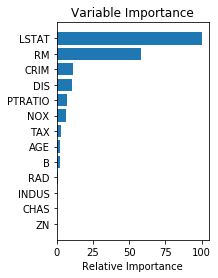

In [54]:
# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()


In [55]:
print(feature_importance)

[1.14121771e+01 2.95315990e-02 4.98252217e-01 1.24363770e-01
 6.64290714e+00 5.82862431e+01 2.48307173e+00 1.08304519e+01
 7.07614532e-01 3.00969327e+00 7.29283323e+00 2.08441690e+00
 1.00000000e+02]


The above analysis demonstrate that the most important variables for predicting the target variable are LSTAT, RM, CRIM,DIS, PTRATIO, NOX, TAX, AND AGE.

## Methodology <a name="methodology"></a>

In this project we will direct our efforts on detecting areas of Berlin that have low restaurant density, particularly those with low number of Italian restaurants. We will limit our analysis to area ~6km around city center.



## Exploratory Analysis <a name="Exploratoryanalysis"></a>

#### Analyze the data distribution of independent variables

In [28]:
df.describe() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136795,0.069170,0.554695,6.284637,68.574898,3.795046,9.549407,408.237152,18.455572,356.674316,12.653063
std,8.601545,23.322399,6.860352,0.253993,0.115878,0.702617,28.148859,2.105710,8.707269,168.537109,2.164947,91.294823,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001


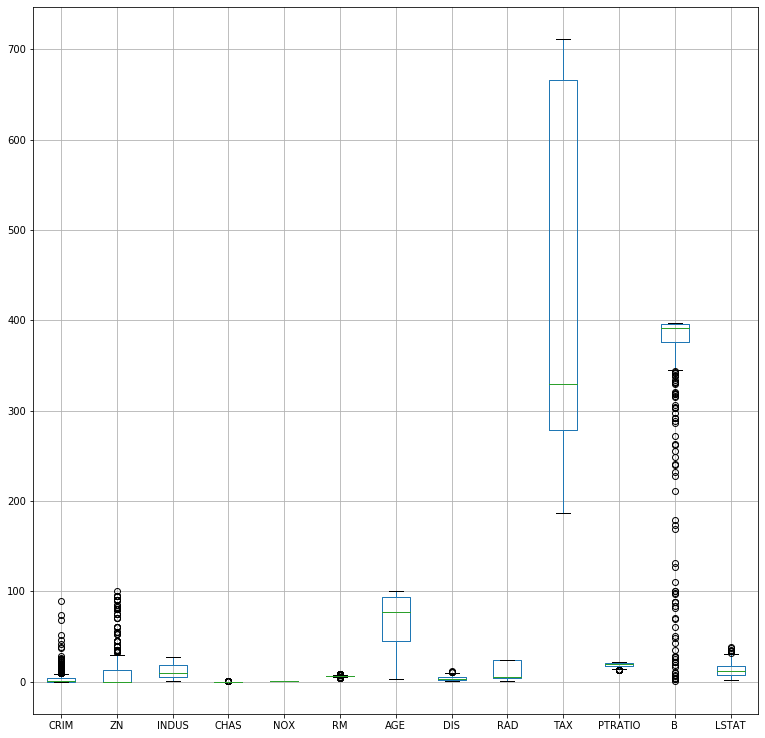

In [56]:
col =['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
df.boxplot(column=col,figsize=(13,13))

#### Analyze correlation  between independent variables

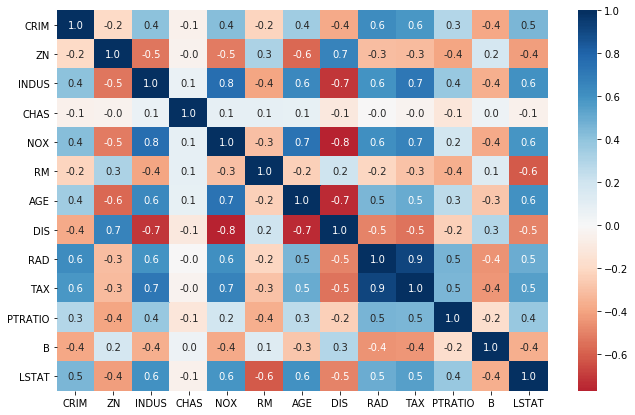

In [58]:
corr = df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)
plt.show()

### Results - Exploratory Analysis
It can be noted that there are great distance between the minimum and maximum values among some indenpendent variables. For instance, for B, the min value is 0.320000  while the max is 396.899994;  for CRIM, the min value is 0.006320  while the max is 88.976196. This can also be demonstrated by the standard deviation (std): 168.537109 for TAX, and  91.294823 for B.

There are also high correlation between certain independent variables, especially between NOX, TAX and INDUS  with other variables. 

The correlation of NOX with INDUS: 0.8, with AGE: 0.7, and with TAX: 0.7.

The correlation of TAX with INDUS: 0.7, with RAD: 0.9, with CRIM: 0.6, and with NOX: 0.7.

The correlation of INDUS with  NOX: 0.8, with LSTAT: 0.6, and with TAX: 0.7.     


### Discussion - Exploratory Analysis
The high correlation between certain independent variables can cause problems for predicting models, especially linear regression, which assumes there is no correlation between consecutive residuals.


## Predictive Modeling <a name="model"></a>

In [60]:
n_folds = 5


br_model = BayesianRidge()


lr_model = LinearRegression()


etc_model = ElasticNet()


svr_model = SVR()


gbr_model = GradientBoostingRegressor()


model_names = ['BayesianRidge', 'LinearRegression', 'ElasticNet', 'SVR', 'GBR']

model_dic = [br_model, lr_model, etc_model, svr_model, gbr_model]

cv_score_list = []

pre_y_list = []


for model in model_dic:
   
    scores = cross_val_score(model, X, y, cv=n_folds)
 
    cv_score_list.append(scores)
   
    pre_y_list.append(model.fit(X, y).predict(X))

n_sample, n_feature = X.shape

model_metrics_name = [explained_variance_score, mean_absolute_error, mean_squared_error, r2_score]

model_metrics_list = []

for pre_y in pre_y_list:
  
    tmp_list = []
   
    for mdl in model_metrics_name:
       
        tmp_score = mdl(y, pre_y)
      
        tmp_list.append(tmp_score)
   
    model_metrics_list.append(tmp_list)
    
df_score = pd.DataFrame(cv_score_list, index=model_names)
df_met = pd.DataFrame(model_metrics_list, index=model_names, columns=['ev', 'mae', 'mse', 'r2'])


#### Display the predicted results in comparison with the real data

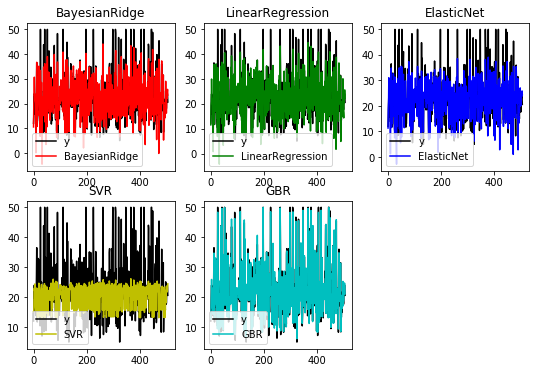

In [61]:
plt.figure(figsize=(9, 6))

color_list = ['r', 'g', 'b', 'y', 'c']

for i, pre_y in enumerate(pre_y_list):
    
    plt.subplot(2, 3, i+1)
    
    plt.plot(np.arange(X.shape[0]), y, color='k', label='y')
    
    plt.plot(np.arange(X.shape[0]), pre_y, color_list[i], label=model_names[i])
    plt.title(model_names[i])
    plt.legend(loc='lower left')
plt.savefig('xxx.png')
plt.show()

In [43]:
print('Cross-validation score:')
print(df_score)

Cross-validation score:
                         0         1         2         3         4
BayesianRidge     0.706012  0.709296  0.632994  0.778066  0.650570
LinearRegression  0.731768  0.717604  0.630617  0.789995  0.652510
ElasticNet        0.665218  0.689513  0.633569  0.699097  0.638720
SVR               0.249776  0.205957  0.203228  0.233234  0.076399
GBR               0.908896  0.781829  0.757715  0.920407  0.905126


In [44]:
print('Metrics:')
print(df_met)

Metrics:
                        ev       mae        mse        r2
BayesianRidge     0.731209  3.317905  22.691182  0.731209
LinearRegression  0.740643  3.270866  21.894831  0.740643
ElasticNet        0.686102  3.594529  26.499144  0.686102
SVR               0.260937  5.259882  66.818898  0.208490
GBR               0.976141  1.114241   2.014201  0.976141


#### Let's use the test dataset to evaluate the performance of the GBR model.

Text(0, 0.5, 'Deviance')

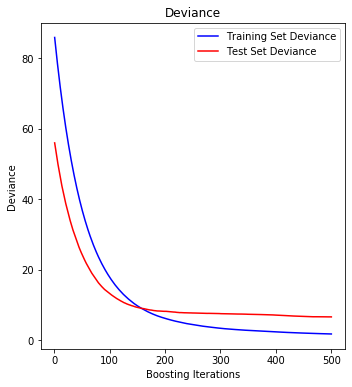

In [6]:
# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')


## Results  <a name="results"></a>

Our analysis shows that The above analysis demonstrate that the most important variables for predicting the target variable are LSTAT, RM, CRIM,DIS, PTRATIO, NOX, TAX, and AGE.

The metrics of the predicting models indicate that GBR is best model, as shown by its least mse of 2.014201  and its largest R-square of 0.976141, while SVR is best model as shown by the largest mse of 66.818898 and the smallest R-square of 0.208490 associated with it.


## Discussion <a name="discussion"></a>

The high correlation between certain independent variables can cause problems for predicting models, especially linear regression, which assumes there is no correlation between consecutive residuals. Thus linear regression may not be a optimum model. 

Further treatment of the independent variables can be conducted to remove the correlations among the independent variables to improve performance of the predicting models.


## Conclusion <a name="conclusion"></a>

Analysis of the Boston house prices dataset  indicates that the most effective factors for predicting the house value are LSTAT - % lower status of the population, RM - average number of rooms per dwelling, CRIM - per capita crime rate by town, DIS - weighted distances to five Boston employment centres, PTRATIO - pupil-teacher ratio by town,  NOX - nitric oxides concentration (parts per 10 million), TAX - full-value property-tax rate per $10,000, and AGE - proportion of owner-occupied units built prior to 1940.

GradientBoostingRegressor provides a very useful predictive model as it performs much better in predicting the house values than BayesianRidge, LinearRegression, ElasticNet, and SVR.
